In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("E:\Datasets\wine quality data.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.duplicated().sum()

240

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [8]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
data.quality.value_counts()

good    855
bad     744
Name: quality, dtype: int64

<AxesSubplot:>

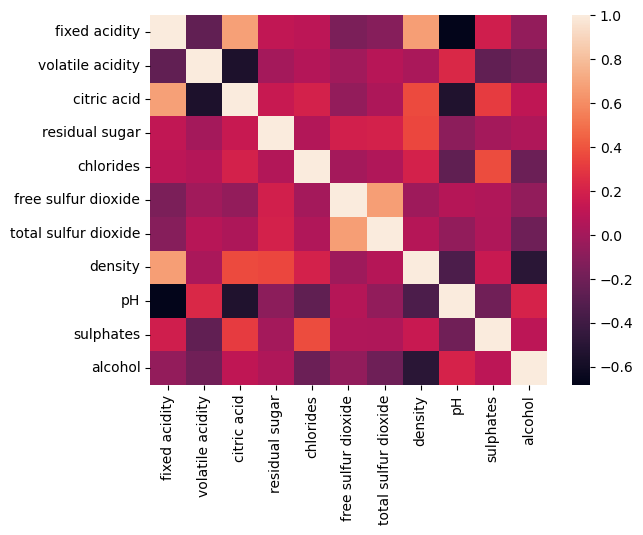

In [10]:
import seaborn as sns
sns.heatmap(data.corr())

In [11]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
data['quality']=la.fit_transform(data['quality'])

In [12]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
y.value_counts()

1    855
0    744
Name: quality, dtype: int64

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm=SMOTE()
x_res,y_data=sm.fit_resample(x,y)
# print(Counter(y_data))
y_data.value_counts()

0    855
1    855
Name: quality, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_data=ss.fit_transform(x_res)

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=100)
print(y_train.value_counts())
print(y_test.value_counts())

0    691
1    677
Name: quality, dtype: int64
1    178
0    164
Name: quality, dtype: int64


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from collections import Counter
l=LogisticRegression()
k=KNeighborsClassifier()
s=SVC()
r= RandomForestClassifier()  

In [18]:
print(l.fit(x_train,y_train))
print(k.fit(x_train,y_train))
print(s.fit(x_train,y_train))
print(r.fit(x_train,y_train))

LogisticRegression()
KNeighborsClassifier()
SVC()
RandomForestClassifier()


In [19]:
x_sample=x.iloc[[5,6,7,8,1340,1131,1153,1240],:]
y_sample=y.iloc[[5,6,7,8,1000,1111,1123,1245]]
y_sample

5       0
6       0
7       1
8       1
1000    1
1111    1
1123    1
1245    0
Name: quality, dtype: int32

In [20]:
y_spred=k.predict(x_sample)
print(y_spred)

[1 1 1 0 1 1 1 1]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [21]:
from sklearn.metrics import accuracy_score
y_pred=k.predict(x_test)
ac=accuracy_score(y_test,y_pred)*100
print(ac)
print(y_pred)

79.53216374269006
[1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1
 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0
 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1
 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0
 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1
 1 0 1 0 0 0 1 1 1]


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
for cls in (l,k,s,r):
    y_pred=cls.predict(x_test)
    cl=classification_report(y_test,y_pred)
    print(cls.__class__.__name__,'\n',(cl))
    print(confusion_matrix(y_test,y_pred))

LogisticRegression 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       164
           1       0.79      0.79      0.79       178

    accuracy                           0.78       342
   macro avg       0.78      0.78      0.78       342
weighted avg       0.78      0.78      0.78       342

[[127  37]
 [ 38 140]]
KNeighborsClassifier 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       164
           1       0.78      0.84      0.81       178

    accuracy                           0.80       342
   macro avg       0.80      0.79      0.79       342
weighted avg       0.80      0.80      0.79       342

[[123  41]
 [ 29 149]]
SVC 
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       164
           1       0.83      0.80      0.82       178

    accuracy                           0.81       342
   macro avg       0.81      0.8

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
for clf in (l,k,s,r):
    y_pred = clf.predict(x_test)
    print(
        clf.__class__.__name__,
        '\n',
        'Accuracy score: ',accuracy_score(y_test, y_pred), '\n',
        'Precision score: ',precision_score(y_test, y_pred, zero_division = 1), '\n',
        'Recall score: ',recall_score(y_test, y_pred, zero_division = 1), '\n',
        'F1 score: ',f1_score(y_test, y_pred, zero_division = 1), '\n',
        'ROC AUC score: ',roc_auc_score(y_test, y_pred), '\n', 

    )

LogisticRegression 
 Accuracy score:  0.7807017543859649 
 Precision score:  0.7909604519774012 
 Recall score:  0.7865168539325843 
 F1 score:  0.7887323943661972 
 ROC AUC score:  0.7804535489175117 

KNeighborsClassifier 
 Accuracy score:  0.7953216374269005 
 Precision score:  0.7842105263157895 
 Recall score:  0.8370786516853933 
 F1 score:  0.8097826086956522 
 ROC AUC score:  0.7935393258426966 

SVC 
 Accuracy score:  0.8128654970760234 
 Precision score:  0.8313953488372093 
 Recall score:  0.8033707865168539 
 F1 score:  0.8171428571428572 
 ROC AUC score:  0.8132707591120856 

RandomForestClassifier 
 Accuracy score:  0.8713450292397661 
 Precision score:  0.8941176470588236 
 Recall score:  0.8539325842696629 
 F1 score:  0.8735632183908046 
 ROC AUC score:  0.8720882433543435 



In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
for clf in (l,k,s,r):
    yt_pred = clf.predict(x_train)
    print(
        clf.__class__.__name__,
        '\n',
        'Accuracy score: ',accuracy_score(y_train, yt_pred), '\n',
        'Precision score: ',precision_score(y_train, yt_pred, zero_division = 1), '\n',
        'Recall score: ',recall_score(y_train, yt_pred, zero_division = 1), '\n',
        'F1 score: ',f1_score(y_train, yt_pred, zero_division = 1), '\n',
        'ROC AUC score: ',roc_auc_score(y_train, yt_pred), '\n', 

    )

LogisticRegression 
 Accuracy score:  0.7353801169590644 
 Precision score:  0.744945567651633 
 Recall score:  0.707533234859675 
 F1 score:  0.7257575757575757 
 ROC AUC score:  0.7350980211925005 

KNeighborsClassifier 
 Accuracy score:  0.8099415204678363 
 Precision score:  0.8052708638360175 
 Recall score:  0.8124076809453471 
 F1 score:  0.8088235294117647 
 ROC AUC score:  0.8099665032801988 

SVC 
 Accuracy score:  0.7887426900584795 
 Precision score:  0.8118971061093248 
 Recall score:  0.7459379615952733 
 F1 score:  0.77752117013087 
 ROC AUC score:  0.7883090676283169 

RandomForestClassifier 
 Accuracy score:  1.0 
 Precision score:  1.0 
 Recall score:  1.0 
 F1 score:  1.0 
 ROC AUC score:  1.0 



In [ ]:
# Use PAC
#Using Principal Dimensional Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
print(pd.DataFrame(explained_variance))

In [24]:
# Cross Validation:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,random_state=100,shuffle=True)
skf.get_n_splits(x_data,y_data)
print(skf)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

StratifiedKFold(n_splits=5, random_state=100, shuffle=True)


In [25]:
# for train_data,test_data in skf.split(x_data,y_data):
#     x_train,x_test=x_data[train_data],x_data[test_data]
#     y_train,y_test=y_data[train_data],y_data[test_data]
scores=cross_val_score(r,x_train,y_train,cv=skf)
# y_pred=cross_val_predict(k,x_test,y_test,cv=skf)
print("Checking y_test Balancing:",Counter(y_test))
#     print("Checking y_train Balancing:",Counter(y_train))
print(np.mean(scores))
#     print("----------------------------------------------------------")

Checking y_test Balancing: Counter({1: 178, 0: 164})
0.7901606908906179


In [26]:
for train_data,test_data in skf.split(x_data,y_data):
    x_train,x_test=x_data[train_data],x_data[test_data]
    y_train,y_test=y_data[train_data],y_data[test_data]
    scores=cross_val_score(k,x_train,y_train,cv=skf)
    y_pred=cross_val_predict(k,x_test,y_test,cv=skf)
    print("Checking y_test Balancing:",Counter(y_test))
    print("Checking y_train Balancing:",Counter(y_train))
    print(scores)
    print("Average Accuracy Score: ",np.mean(scores))
    print("----------------------------------------------------------")

Checking y_test Balancing: Counter({0: 171, 1: 171})
Checking y_train Balancing: Counter({0: 684, 1: 684})
[0.73357664 0.72627737 0.69708029 0.77289377 0.76190476]
Average Accuracy Score:  0.7383465682735755
----------------------------------------------------------
Checking y_test Balancing: Counter({0: 171, 1: 171})
Checking y_train Balancing: Counter({0: 684, 1: 684})
[0.74817518 0.7080292  0.72992701 0.72161172 0.72893773]
Average Accuracy Score:  0.727336167482153
----------------------------------------------------------
Checking y_test Balancing: Counter({1: 171, 0: 171})
Checking y_train Balancing: Counter({0: 684, 1: 684})
[0.72992701 0.73722628 0.72627737 0.73626374 0.73626374]
Average Accuracy Score:  0.7331916258923558
----------------------------------------------------------
Checking y_test Balancing: Counter({1: 171, 0: 171})
Checking y_train Balancing: Counter({0: 684, 1: 684})
[0.74087591 0.68978102 0.72992701 0.71062271 0.72161172]
Average Accuracy Score:  0.718563674

In [33]:
# y_pred=cross_val_predict(k,x_sample,y_sample,cv=skf)

In [29]:
# bagging classifier
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(base_estimator=k,n_estimators=5,random_state=14)
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=5,
                  random_state=14)

In [30]:
from sklearn.metrics import accuracy_score
bg_vote=bg.predict(x_test)
bg1_vote=accuracy_score(y_test,bg_vote)*100
print(bg1_vote)

73.39181286549707


In [31]:
import pickle